In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [10]:
#Reference: https://machinelearningmastery.com/display-deep-learning-model-training-history-in-keras/
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt
import numpy
import pandas as pd

In [11]:
# load pima indians dataset
dataset = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Files/Indian_diabetes.csv")

In [12]:
dataset.head(2)

,f1,f2,f3,f4,f5,f6,f7,f8,T
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0


In [43]:
dataset.shape

(768, 9)

In [14]:
# split into input (X) and output (Y) variables
X = dataset.iloc[:,0:7]
Y = dataset.iloc[:,7]

In [37]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=42)

In [44]:
# create model
model = Sequential()
model.add(Dense(16, input_dim=X.shape[1], activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


In [45]:
model.fit(X_train,y_train, epochs=10, batch_size=10)

Epoch 1/10
54/54 [==============================] - 1s 2ms/step - loss: 282.0164 - accuracy: 0.0000e+00
Epoch 2/10
54/54 [==============================] - 0s 2ms/step - loss: -2565.1929 - accuracy: 0.0000e+00
Epoch 3/10
54/54 [==============================] - 0s 2ms/step - loss: -5817.8618 - accuracy: 0.0000e+00
Epoch 4/10
54/54 [==============================] - 0s 2ms/step - loss: -13184.9766 - accuracy: 0.0000e+00
Epoch 5/10
54/54 [==============================] - 0s 2ms/step - loss: -29354.5879 - accuracy: 0.0000e+00
Epoch 6/10
54/54 [==============================] - 0s 2ms/step - loss: -56361.4258 - accuracy: 0.0000e+00
Epoch 7/10
54/54 [==============================] - 0s 2ms/step - loss: -97789.2812 - accuracy: 0.0000e+00
Epoch 8/10
54/54 [==============================] - 0s 2ms/step - loss: -157195.5000 - accuracy: 0.0000e+00
Epoch 9/10
54/54 [==============================] - 0s 2ms/step - loss: -236519.0156 - accuracy: 0.0000e+00
Epoch 10/10
54/54 [=====================

In [46]:
# Fit the model
history = model.fit(X_train, y_train, validation_data=(X_test,y_test), epochs=10, batch_size=6)
# list all data in history
print(history.history.keys())

Epoch 1/10
90/90 [==============================] - 0s 5ms/step - loss: -512092.0000 - accuracy: 0.0000e+00 - val_loss: -649313.2500 - val_accuracy: 0.0000e+00
Epoch 2/10
90/90 [==============================] - 0s 3ms/step - loss: -791484.1250 - accuracy: 0.0000e+00 - val_loss: -969691.3125 - val_accuracy: 0.0000e+00
Epoch 3/10
90/90 [==============================] - 0s 2ms/step - loss: -1152293.8750 - accuracy: 0.0000e+00 - val_loss: -1387696.2500 - val_accuracy: 0.0000e+00
Epoch 4/10
90/90 [==============================] - 0s 2ms/step - loss: -1604837.6250 - accuracy: 0.0000e+00 - val_loss: -1895004.5000 - val_accuracy: 0.0000e+00
Epoch 5/10
90/90 [==============================] - 0s 3ms/step - loss: -2157118.0000 - accuracy: 0.0000e+00 - val_loss: -2502391.2500 - val_accuracy: 0.0000e+00
Epoch 6/10
90/90 [==============================] - 0s 3ms/step - loss: -2811130.2500 - accuracy: 0.0000e+00 - val_loss: -3221522.7500 - val_accuracy: 0.0000e+00
Epoch 7/10
90/90 [==============

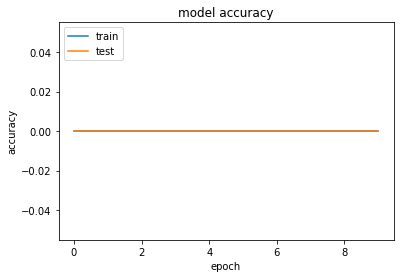

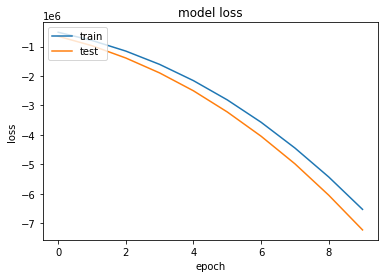

In [47]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()